#A Faster Algorithm for Betweenness Centrality

>The betweenness centrality index is essential in the analysis of social networks, but costly to compute.  
꼭 필요하지만 계산이 어려움.  
Currently, the fastest known algorithms require Θ(\\({n}^{3}\\)) time and Θ(\\({n}^{2}\\)) space, where n is the number of actors in the network.   
Motivated by the fast-growing need to compute centrality indices on large, yet very sparse, networks, new algorithms for betweenness are introduced in this paper.

##1. Introduction

- In social network analysis, graph-theoretic concepts are used to understand and explain social phenomena.  
사회 현상을 이해하고 설명하는데 이용된다.  
- An essential tool for the analysis of social networks are centrality indices defined on the vertices of the graph   
그래프 점들의 중심도 지수는 소셜 네트워크 분석에 필수적이다.  
- Many centrality indices are based on shortest paths linking pairs of actors, measuring, e.g., the average distance from other actors, or the ratio of shortest paths an actor lies on.  
많은 중심도 지수가 최단거리에 기반을 두고 있다.  
- With the increasing practicality of electronic data collection and, of course, the advent of the Web, there is a likewise increasing demand for the computation of centrality indices on networks with thousands of actors.  
웹의 시대, 전자 정보 수집의 증가 등으로 중심도 지수는 수천개의 요소들의 계산이 필요하다.  
- **However, there is an Ω(n3) bottleneck in existing implementations, due to the particularly important betweenness centrality index**  
그러나 betweenness 지수는 오래 걸린다.  
-  network analysts are now suggesting simpler indices, for instance based only on linkages between the neighbors of each actors to at least obtain rough approximations of betweenness centrality.  
- **In this paper, we show that betweenness can be computed exactly even for fairly large networks.**  
- We introduce more efficient algorithms based on a new accumulation technique that integrates well with traversal algorithms solving the single-source shortest-paths problem, and thus exploiting the sparsity of typical instances.  
- **it turns out that all standard centrality indices based on shortest paths can thus be evaluated simultaneously, further reducing both the time and space requirements of comparative analyses.**  
- In Section 2  The centrality indices relevant here are defined.
- In Section 3, we review methods computing all shortest paths between all pairs of actors in a network.

##2. Centrality Indices Based on Shortest Paths

1. graph G = (V, E), where the set V of vertices represents actors, and the set E of edges repre- sents links between actors  
2. Let ω be a weight function on the edges.  
  - ω(e) > 0, e ∈ E, for weighted graphs, and define ω(e) = 1, e ∈ E, for unweighted graphs.  
3. Define a path from s ∈ V to t ∈ V as an alternating sequence of vertices and edges  
  - The length of a path is the sum of the weights of its edges.  
4. We use dG(s,t) to denote the distance between vertices s and t, i.e. the minimum length of any path connecting s and t in G
  - By definition, \\({d}_{G}(s,s) = 0\\) for every \\(s ∈ V\\), and \\(d_G(s,t) = d_G(t,s)\\) for \\(s, t ∈ V\\) 
5. Let \\(σ_{st}(v)\\) denote the number of shortest paths from s to t that some v ∈ V lies on.  

---------------------

\\(m = \frac{m_0}{\sqrt{1-\frac{v^2}{c^2}}}\\)

In [1]:
import networkx
#import matplotlib
import operator

In [2]:
def printGraph(G):
    print "Number of Nodes : ", networkx.number_of_nodes(G)
    print "Number of Edges : ", networkx.number_of_edges(G)
    degreelist = list(G.degree().values())
    print "Avg. Node Degree : ", float(sum(degreelist))/networkx.number_of_nodes(G)
    print "Avg. Path Length : ", networkx.average_shortest_path_length(G,weight=None)
    print "Avg. Clustering Cofficient : ", networkx.average_clustering(G)

In [12]:
G = networkx.Graph()
%matplotlib inline

In [13]:
G.add_nodes_from(['A','B','C','D','E','F','G','H','I','J','K','L','M','N'])
G.add_edges_from([('A','G'),('A','B'),('A','D'),('K','A'),('F','E'),('I','C'),('A','H'),('C','E'),('B','H'),('A','F'),('N','B'),('F','J'),('J','L'),('D','N'),('M','N'),('C','K')])
degree=networkx.degree(G).values()

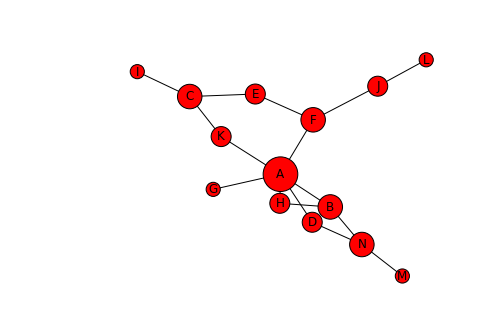

In [14]:
networkx.draw(G, node_size=[v*200 for v in degree],with_labels=True)

In [15]:
printGraph(G)

Number of Nodes :  14
Number of Edges :  16
Avg. Node Degree :  2.28571428571
Avg. Path Length :  2.73626373626
Avg. Clustering Cofficient :  0.1


In [16]:
print G.degree()

{'A': 6, 'C': 3, 'B': 3, 'E': 2, 'D': 2, 'G': 1, 'F': 3, 'I': 1, 'H': 2, 'K': 2, 'J': 2, 'M': 1, 'L': 1, 'N': 3}


- ###closeness centrality    

 > A central node should reach the remaining nodes more quickly than a non-central node.  
 Closeness centrality measure how close a node is to all the other nodes.

![closeness](http://218.150.181.120/resources/closeness.png)

In [17]:
print "----- Closeness Centrality"
print
Close = networkx.closeness_centrality(G)
sorted_list = sorted(Close.iteritems(),key=operator.itemgetter(1),reverse=True)
for s in sorted_list:
    print s[0]," : ", s[1]

----- Closeness Centrality

A  :  0.565217391304
F  :  0.481481481481
B  :  0.433333333333
K  :  0.433333333333
D  :  0.41935483871
H  :  0.40625
E  :  0.382352941176
C  :  0.371428571429
G  :  0.371428571429
J  :  0.351351351351
N  :  0.342105263158
I  :  0.276595744681
L  :  0.265306122449
M  :  0.26


- ### graph centrality

>Graph centrality is defined as the distance to the farthest vertex from the vertex in question  
(임의의 정점 하나로부터 가장 멀리 있는 정점과의 거리로 정의)

![closeness](http://218.150.181.120/resources/graph.png)

In [18]:
def graph_centrality(G):
    pass

- ### stress centrality

>The stress centrality of a node n is the number of shortest paths passing through n. 

![closeness](http://218.150.181.120/resources/stress.png)

- ### betweenness centrality

![closeness](http://218.150.181.120/resources/betweennes.png)

In [19]:
print "----- Betweenness Centrality"
print
Close = networkx.betweenness_centrality(G)
sorted_list = sorted(Close.iteritems(),key=operator.itemgetter(1),reverse=True)
for s in sorted_list:
    print s[0]," : ", s[1]

----- Betweenness Centrality

A  :  0.660256410256
F  :  0.371794871795
K  :  0.179487179487
C  :  0.166666666667
N  :  0.160256410256
J  :  0.153846153846
B  :  0.141025641026
D  :  0.115384615385
E  :  0.0769230769231
G  :  0.0
I  :  0.0
H  :  0.0
M  :  0.0
L  :  0.0


In [20]:
print "----- Degree Centrality"
print
Close = networkx.degree_centrality(G)
sorted_list = sorted(Close.iteritems(),key=operator.itemgetter(1),reverse=True)
for s in sorted_list:
    print s[0]," : ", s[1]

----- Degree Centrality

A  :  0.461538461538
C  :  0.230769230769
B  :  0.230769230769
F  :  0.230769230769
N  :  0.230769230769
E  :  0.153846153846
D  :  0.153846153846
H  :  0.153846153846
K  :  0.153846153846
J  :  0.153846153846
G  :  0.0769230769231
I  :  0.0769230769231
M  :  0.0769230769231
L  :  0.0769230769231


-----

High centrality scores thus indicate that a vertex can reach others on relatively short paths, or that a vertex lies on considerable fractions of shortest paths connecting others

##Lemma 1 (Bellman criterion)

#A vertex v ∈ V lies on a shortest path between vertices s, t ∈ V , if and only if \\({d}_{G}\\)(s, t) =dG(s, v) + dG(v, t).

![lemma1](http://218.150.181.120/resources/lemma1.png)

Therefore, betweenness centrality is traditionally determined in two steps:
1. compute the length and number of shortest paths between all pairs
2. sum all pair-dependencies

** pair- dependency is defined as the dependency of a single vertex on another one**

------

##3. Counting the Number of Shortest Paths

The two implementations most widely used to compute betweenness are UCINET and SNAPS.

![closeness](http://218.150.181.120/resources/UNINET.png)

![closeness](http://218.150.181.120/resources/snap.png)

![closeness](http://218.150.181.120/resources/gephi.png)

##Lemma 2 (Algebraic path counting)

- Let Ak = (a(k)) be the k-th uv u,v∈V  
- power of the adjacency matrix of an unweighted graph. Then a(k) equals the uv  
- number of paths from u to v of length exactly k.  
**인접행렬 특징. 인접행렬의 거듭제곱은 거듭제곱 개수만큼의 거리 갯수, 제곱의 대각선은 각 노드의 차수**

In [21]:
adj= networkx.to_numpy_matrix(G)
print adj

[[ 0.  0.  1.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]


In [22]:
print G.degree()
adj_2=adj **2
print adj_2

{'A': 6, 'C': 3, 'B': 3, 'E': 2, 'D': 2, 'G': 1, 'F': 3, 'I': 1, 'H': 2, 'K': 2, 'J': 2, 'M': 1, 'L': 1, 'N': 3}
[[ 6.  1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  2.]
 [ 1.  3.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  3.  0.  2.  1.  1.  0.  1.  1.  0.  1.  0.  0.]
 [ 1.  0.  0.  2.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.]
 [ 0.  0.  2.  0.  2.  1.  1.  0.  1.  1.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  1.  1.  3.  0.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  1.  1.  1.  0.  2.  1.  0.  0.  0.  1.]
 [ 0.  0.  1.  1.  1.  1.  1.  1.  1.  2.  0.  0.  0.  0.]
 [ 1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.]
 [ 2.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  3.]]


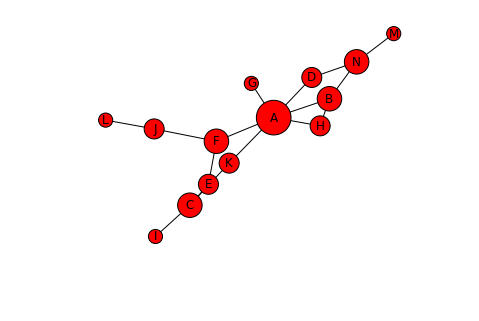

In [23]:
networkx.draw(G, node_size=[v*200 for v in degree],with_labels=True)

- ###Clearly, algebraic path counting computes more information than needed.  
- Instead of the number of paths of length shorter than the diameter of the network, we are only interested in the number of shortest paths between each pair of vertices.

In [24]:
networkx.diameter(G)

6

---

To exploit the sparsity of typical instances, we count shortest paths using traversal algorithms.(희소그래프)   
Both breadth-first search (BFS) for unweighted and Dijkstra’s algorithm for weighted graphs start with a specified source s ∈ V and, at each step, add a closest vertex the set of already discovered vertices in order to find shortest paths from the source to all other vertices

- ## breadth-first search  
![img](http://cfile8.uf.tistory.com/image/26072E5051A6F9A2339C0F)  
그래프의 크기에 비례하는 공간, 시간 복잡도를 가진다.

- [Step 1]  

| queue |
| :------: | 
|   | 
|   | 
|   | 
|   |
|   |  
| a |

- [Step 2]  

| queue |
| :------: | 
|   | 
|   | 
|   | 
|   |
| c |  
| b |  
                                                        A

- [Step 3]  

| queue |
| :------: | 
|   | 
|   | 
|   | 
| e |
| d |  
| c |  
                                                        AB

----

- ##Dijkstra’s algorithm  
![img](http://tech-algorithm.com/uploads/dgraph01.png)

- [Step 1]  

|  | Parent | Distance |
| :------: | :---: | :---------: |
| a  | a | - |
| b  | a | 1 |
| c  | a | ∞ |
| d  | a | ∞ |
| e  | a | 2 |
| f  | a | 1 |
| g  | a | ∞ |
| h  | a | ∞ |

- [Step 2]  

|  | Parent | Distance |
| :------: | :---: | :---------: |
| a  | a | - |
| b  | a | 1 |
| c  | **b** | 3 |
| d  | **e** | 3 |
| e  | a | 2 |
| f  | a | 1 |
| g  | **b** | 2 |
| h  | a | ∞ |

---

Define the set of predecessors of a vertex v on shortest paths from s as

![closeness](http://218.150.181.120/resources/lemma2.png)

----

## Lemma 3 (Combinatorial shortest-path counting) For s≠ v ∈ V

![closeness](http://218.150.181.120/resources/lemma3.png)

##Proof

- Since all edge weights are positive, the last edge of any shortest path from s to v is an edge {u,v} ∈ E such that dG(s,u) < dG(s,v).  
- Clearly, the number of shortest paths from s to v ending with this edge equals the number of shortest paths from s to u.  
- Lemma 1

![closeness](http://218.150.181.120/resources/corollary4.png)

Consequently, \\({σ}_{st}\\), s,t ∈ V, can be computed in time O(nm) for un- weighted and in time O(nm + n2 log n) for weighted graphs.

###In the next section we show how to reduce these complexities substantially by accumulating partial sums of pair-dependencies.

# ------END------

-----

#4. Accumulation of Pair-Dependencies

1. Betweenness는 네트워크가 커지면 계산이 상당히 복잡해지는 단점이 있음.
2. Brandes가 특정(희소그래프) 상황에서 빠른 알고리즘을 제안함.
3. Betweenness를 구하려면 크게 두가지 계산이 필요한데, 그 중 첫 번째는 모든 점들 사이의 최단경로와 개수를 계산해야함.
4. 본 장에서는 비가중치그래프에서 너비우선탐색 기법을 활용하여 최단경로와 개수를 구했음.

**오늘은 두 번째로 모든 Pair-Dependencies를 계산하는 것에 대해 알아 봄( Pair-Dependencies = 임의의 점 v를 지나는 최단 경로 개수 / 모든 최단 경로 개수)**

너비 우선 탐색에서 \\(P_s(v)\\)를 사용하는 것 잊지 말기

![closeness](http://218.150.181.120/resources/lemma2.png)

To eliminate the need for explicit summation of all pair-dependencies,   
we introduce first the notion of the dependency of a vertex s ∈ V on a single vertex v ∈ V , defined as

The crucial observation is that these partial sums obey a recursive relation.

![4.1](https://github.com/HeoJooSeong/zoostar/blob/master/LINK_LAB/A%20Faster%20Algorithm%20for%20Betweenness%20Centrality/이미지/4.1.png?raw=true)

![4.2](https://github.com/HeoJooSeong/zoostar/blob/master/LINK_LAB/A%20Faster%20Algorithm%20for%20Betweenness%20Centrality/이미지/4.2.png?raw=true)

Figure 1: With the assumption of Lemma 5, a vertex lies on all shortest
paths to its successors in the tree of shortest paths from the source

![lemma5](https://github.com/HeoJooSeong/zoostar/blob/master/LINK_LAB/A%20Faster%20Algorithm%20for%20Betweenness%20Centrality/이미지/lemma5.png?raw=true)

###Proof
The assumption implies that the vertices and edges of all shortest paths form s form a tree.  
Therefore, v lies on either all or none of the paths between s and some t ∈ V , i.e. \\(δ_{st}(v)\\) equals either 1 or 0.  
Moreover, v lies on all shortest paths to those vertices for which it is a predecessor, and on all shortest paths that these lie on

In [96]:
G2 = networkx.Graph()
%matplotlib inline

In [101]:
G2.add_nodes_from(['S','V','W1','W2','W3','G','H','I','J','K','L'])
G2.add_edges_from([('S','V'),('V','W1'),('V','W2'),('V','W3'),('W1','G'),('W1','H'),('W2','I'),
                   ('W2','J'),('W3','K'),('W3','L')])

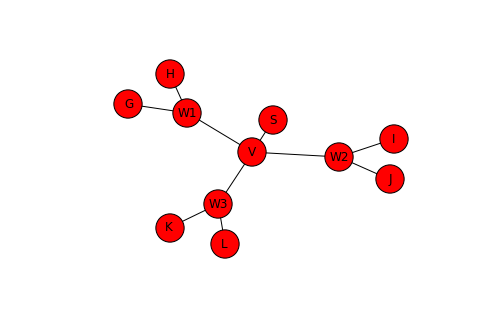

In [102]:
networkx.draw(G2,node_size=800,with_labels=True)

In the general case, a very similar relation holds.

![theorem](https://github.com/HeoJooSeong/zoostar/blob/master/LINK_LAB/A%20Faster%20Algorithm%20for%20Betweenness%20Centrality/이미지/theorem6.png?raw=true)

![figure2](https://github.com/HeoJooSeong/zoostar/blob/master/LINK_LAB/A%20Faster%20Algorithm%20for%20Betweenness%20Centrality/이미지/figure2.png?raw=true)

###Proof    
Recall that \\(δ_{st}(v)>0 \\) only for those t ∈ V \ {s} for which v lies on at least one shortest path from s to t, and notice that on any such path there is exactly one edge {v,w} with \\(v ∈ P_s(w)\\).   
This slightly more complicated situation is illustrated in Figure 2  
We extend pair-dependency to include an edge e ∈ E by defining  \\(δ_{st}(v,e)=σ_{st}(v,e) \\) where \\(σ_{st}(v,e) \\) is the number of shortest paths from s to t that contain both v and e

![proof1](https://github.com/HeoJooSeong/zoostar/blob/master/LINK_LAB/A%20Faster%20Algorithm%20for%20Betweenness%20Centrality/이미지/proof1.png?raw=true)

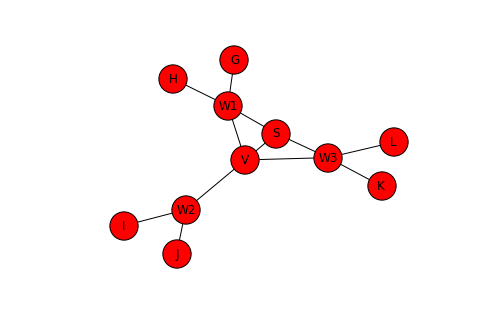

In [113]:
G3 = networkx.Graph()
%matplotlib inline
G3.add_nodes_from(['S','V','W1','W2','W3','G','H','I','J','K','L'])
G3.add_edges_from([('S','V'),('V','W1'),('V','W2'),('V','W3'),('W1','G'),('W1','H'),('W2','I'),
                   ('W2','J'),('W3','K'),('W3','L'),('S','W1'),('S','W3')])
networkx.draw(G3,node_size=800,with_labels=True)

###Corollary 7   
Given the directed acyclic graph of shortest paths from s ∈ V in G, the dependencies of s on all other vertices can be computed in \\(O(m)\\) time and \\(O(n + m)\\) space.

###Proof  
Traverse the vertices in non-increasing order of their distance from s and accumulate dependencies by applying Theorem 6.   
We need to store a dependency per vertex, and lists of predecessors. There is at most one element per edge in any of these lists.

With this result, we can determine the betweenness centrality index by solving one single-source shortest-paths problem for each vertex.   
At the end of each iteration, the dependencies of the source on each other vertex are added to the centrality score of that vertex.   
For unweighted graphs, the algorithm can be implemented as described in Algorithm 1.   
Note that the centrality scores need to be divided by two if the graph is undirected, since all shortest paths are considered twice. The modifications necessary for weighted graphs are straightforward.

![theorem](https://github.com/HeoJooSeong/zoostar/blob/master/LINK_LAB/A%20Faster%20Algorithm%20for%20Betweenness%20Centrality/이미지/theorem8.png?raw=true)

#5. Practical Implications

In [116]:
# coding=utf8
"""
Betweenness centrality measures.
"""
from heapq import heappush, heappop
from itertools import count
import networkx as nx
import random


def betweenness_centrality(G, k=None, normalized=True, weight=None,
                           endpoints=False,
                           seed=None):
   
    betweenness = dict.fromkeys(G, 0.0)  # b[v]=0 for v in G
    if k is None:
        nodes = G
    else:
        random.seed(seed)
        nodes = random.sample(G.nodes(), k)
    for s in nodes:
        # single source shortest paths
        if weight is None:  # use BFS
            S, P, sigma = _single_source_shortest_path_basic(G, s)
        else:  # use Dijkstra's algorithm
            S, P, sigma = _single_source_dijkstra_path_basic(G, s, weight)
        # accumulation
        if endpoints:
            betweenness = _accumulate_endpoints(betweenness, S, P, sigma, s)
        else:
            betweenness = _accumulate_basic(betweenness, S, P, sigma, s)
    # rescaling
    betweenness = _rescale(betweenness, len(G),
                           normalized=normalized,
                           directed=G.is_directed(),
                           k=k)
    return betweenness

def _single_source_shortest_path_basic(G, s):
    S = []
    P = {}
    for v in G:
        P[v] = []
    sigma = dict.fromkeys(G, 0.0)    # sigma[v]=0 for v in G
    D = {}
    sigma[s] = 1.0
    D[s] = 0
    Q = [s]
    while Q:   # use BFS to find shortest paths
        v = Q.pop(0)
        S.append(v)
        Dv = D[v]
        sigmav = sigma[v]
        for w in G[v]:
            if w not in D:
                Q.append(w)
                D[w] = Dv + 1
            if D[w] == Dv + 1:   # this is a shortest path, count paths
                sigma[w] += sigmav
                P[w].append(v)  # predecessors
    return S, P, sigma


def _single_source_dijkstra_path_basic(G, s, weight='weight'):
    # modified from Eppstein
    S = []
    P = {}
    for v in G:
        P[v] = []
    sigma = dict.fromkeys(G, 0.0)    # sigma[v]=0 for v in G
    D = {}
    sigma[s] = 1.0
    push = heappush
    pop = heappop
    seen = {s: 0}
    c = count()
    Q = []   # use Q as heap with (distance,node id) tuples
    push(Q, (0, next(c), s, s))
    while Q:
        (dist, _, pred, v) = pop(Q)
        if v in D:
            continue  # already searched this node.
        sigma[v] += sigma[pred]  # count paths
        S.append(v)
        D[v] = dist
        for w, edgedata in G[v].items():
            vw_dist = dist + edgedata.get(weight, 1)
            if w not in D and (w not in seen or vw_dist < seen[w]):
                seen[w] = vw_dist
                push(Q, (vw_dist, next(c), v, w))
                sigma[w] = 0.0
                P[w] = [v]
            elif vw_dist == seen[w]:  # handle equal paths
                sigma[w] += sigma[v]
                P[w].append(v)
    return S, P, sigma


def _accumulate_basic(betweenness, S, P, sigma, s):
    delta = dict.fromkeys(S, 0)
    while S:
        w = S.pop()
        coeff = (1.0 + delta[w]) / sigma[w]
        for v in P[w]:
            delta[v] += sigma[v] * coeff
        if w != s:
            betweenness[w] += delta[w]
    return betweenness


def _accumulate_endpoints(betweenness, S, P, sigma, s):
    betweenness[s] += len(S) - 1
    delta = dict.fromkeys(S, 0)
    while S:
        w = S.pop()
        coeff = (1.0 + delta[w]) / sigma[w]
        for v in P[w]:
            delta[v] += sigma[v] * coeff
        if w != s:
            betweenness[w] += delta[w] + 1
    return betweenness

def _rescale(betweenness, n, normalized, directed=False, k=None):
    if normalized is True:
        if n <= 2:
            scale = None  # no normalization b=0 for all nodes
        else:
            scale = 1.0 / ((n - 1) * (n - 2))
    else:  # rescale by 2 for undirected graphs
        if not directed:
            scale = 1.0 / 2.0
        else:
            scale = None
    if scale is not None:
        if k is not None:
            scale = scale * n / k
        for v in betweenness:
            betweenness[v] *= scale
    return betweenness